# Análisis Exploratorio

### Importar librerias

In [4]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import math
import nbformat

### Cargar Archivo CSV

In [5]:
df=pd.read_csv("datos_apartamentos_rent.csv")

### Ánalisis Descriptivo

In [13]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,790,Monthly,101,NaN,Washington,DC,389057.0,-769861.0,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,425,Monthly,106,814 Schutte Rd,Evansville,IN,379680.0,-876621.0,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,1.39,Monthly,107,NaN,Arlington,VA,388910.0,-770816.0,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,925,Monthly,116,1717 12th Avenue,Seattle,WA,476160.0,-1223275.0,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,880,Monthly,125,NaN,Arlington,VA,388738.0,-771055.0,RentLingo,1577359401


In [6]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9.990000e+03,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,376951.620420,-9.465225e+05,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,54958.509131,1.575980e+05,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,213155.000000,-1.580221e+06,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,336798.500000,-1.013017e+06,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,388098.000000,-9.365160e+05,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,413498.000000,-8.220998e+05,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,615940.000000,-7.019160e+05,1.577362e+09


### Histogramas

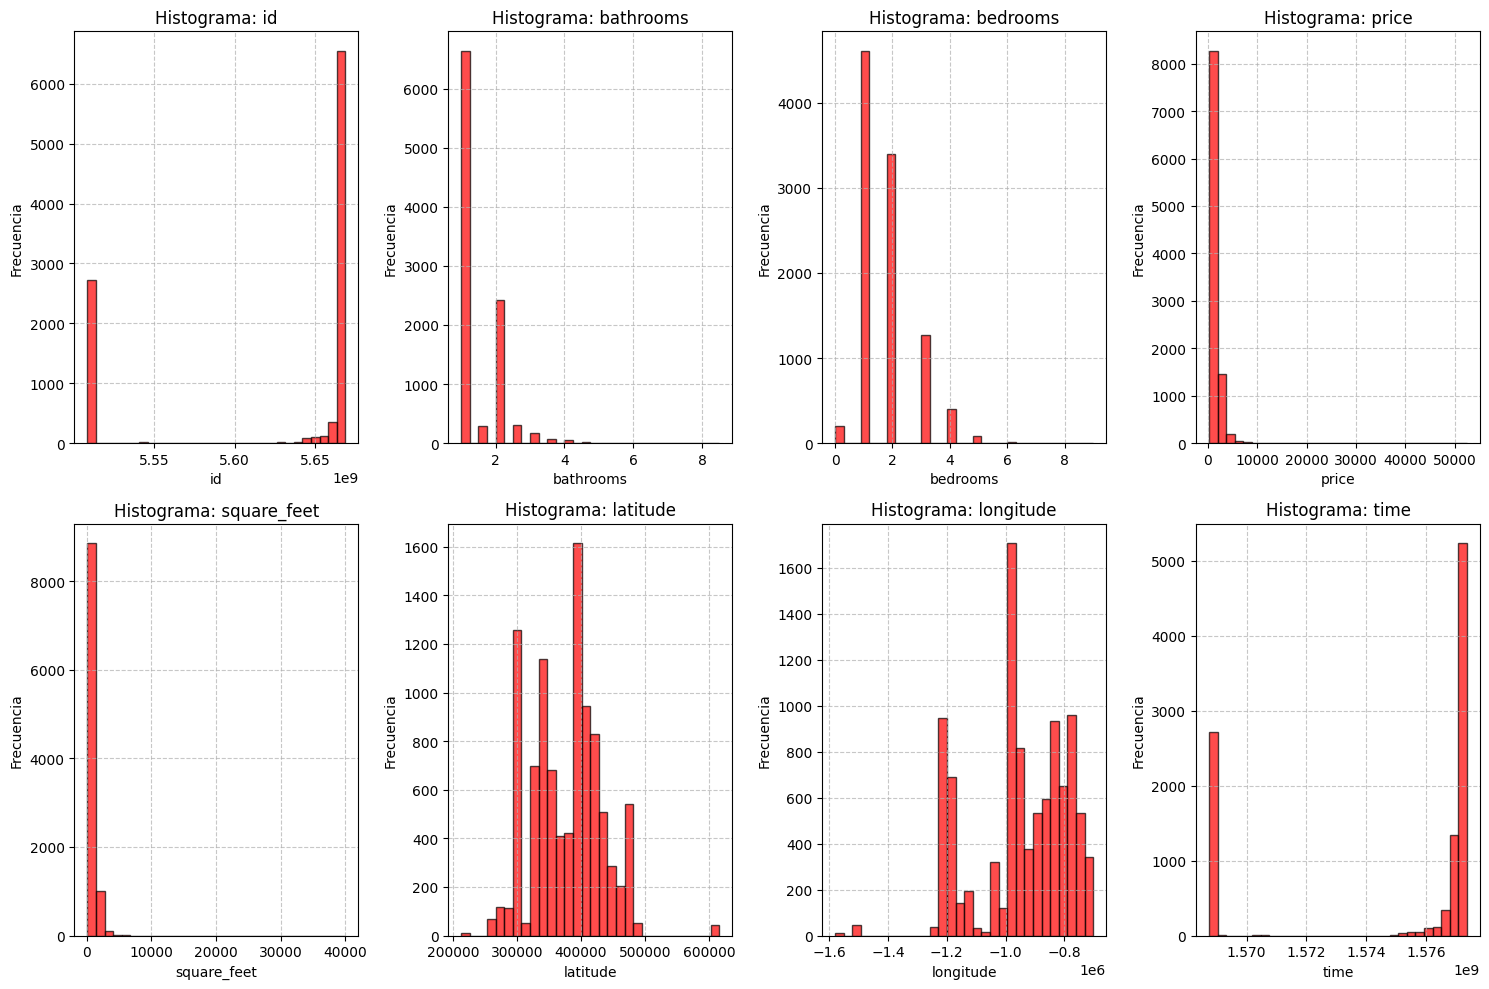

In [7]:
# Seleccionar solo variables numéricas
num_variables = df.select_dtypes(include=['float64', 'int64'])

# Definir el número de columnas y filas para la matriz de histogramas
num_vars = len(num_variables.columns)
cols = 4  # Número de columnas en la matriz
rows = math.ceil(num_vars / cols)  # Número de filas

# Crear la matriz de subplots
plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(num_variables.columns, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[column], bins=30, alpha=0.7, color='red', edgecolor='black')
    plt.title(f'Histograma: {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajuste automático del espacio entre gráficos
plt.show()


# Diagramas de Caja

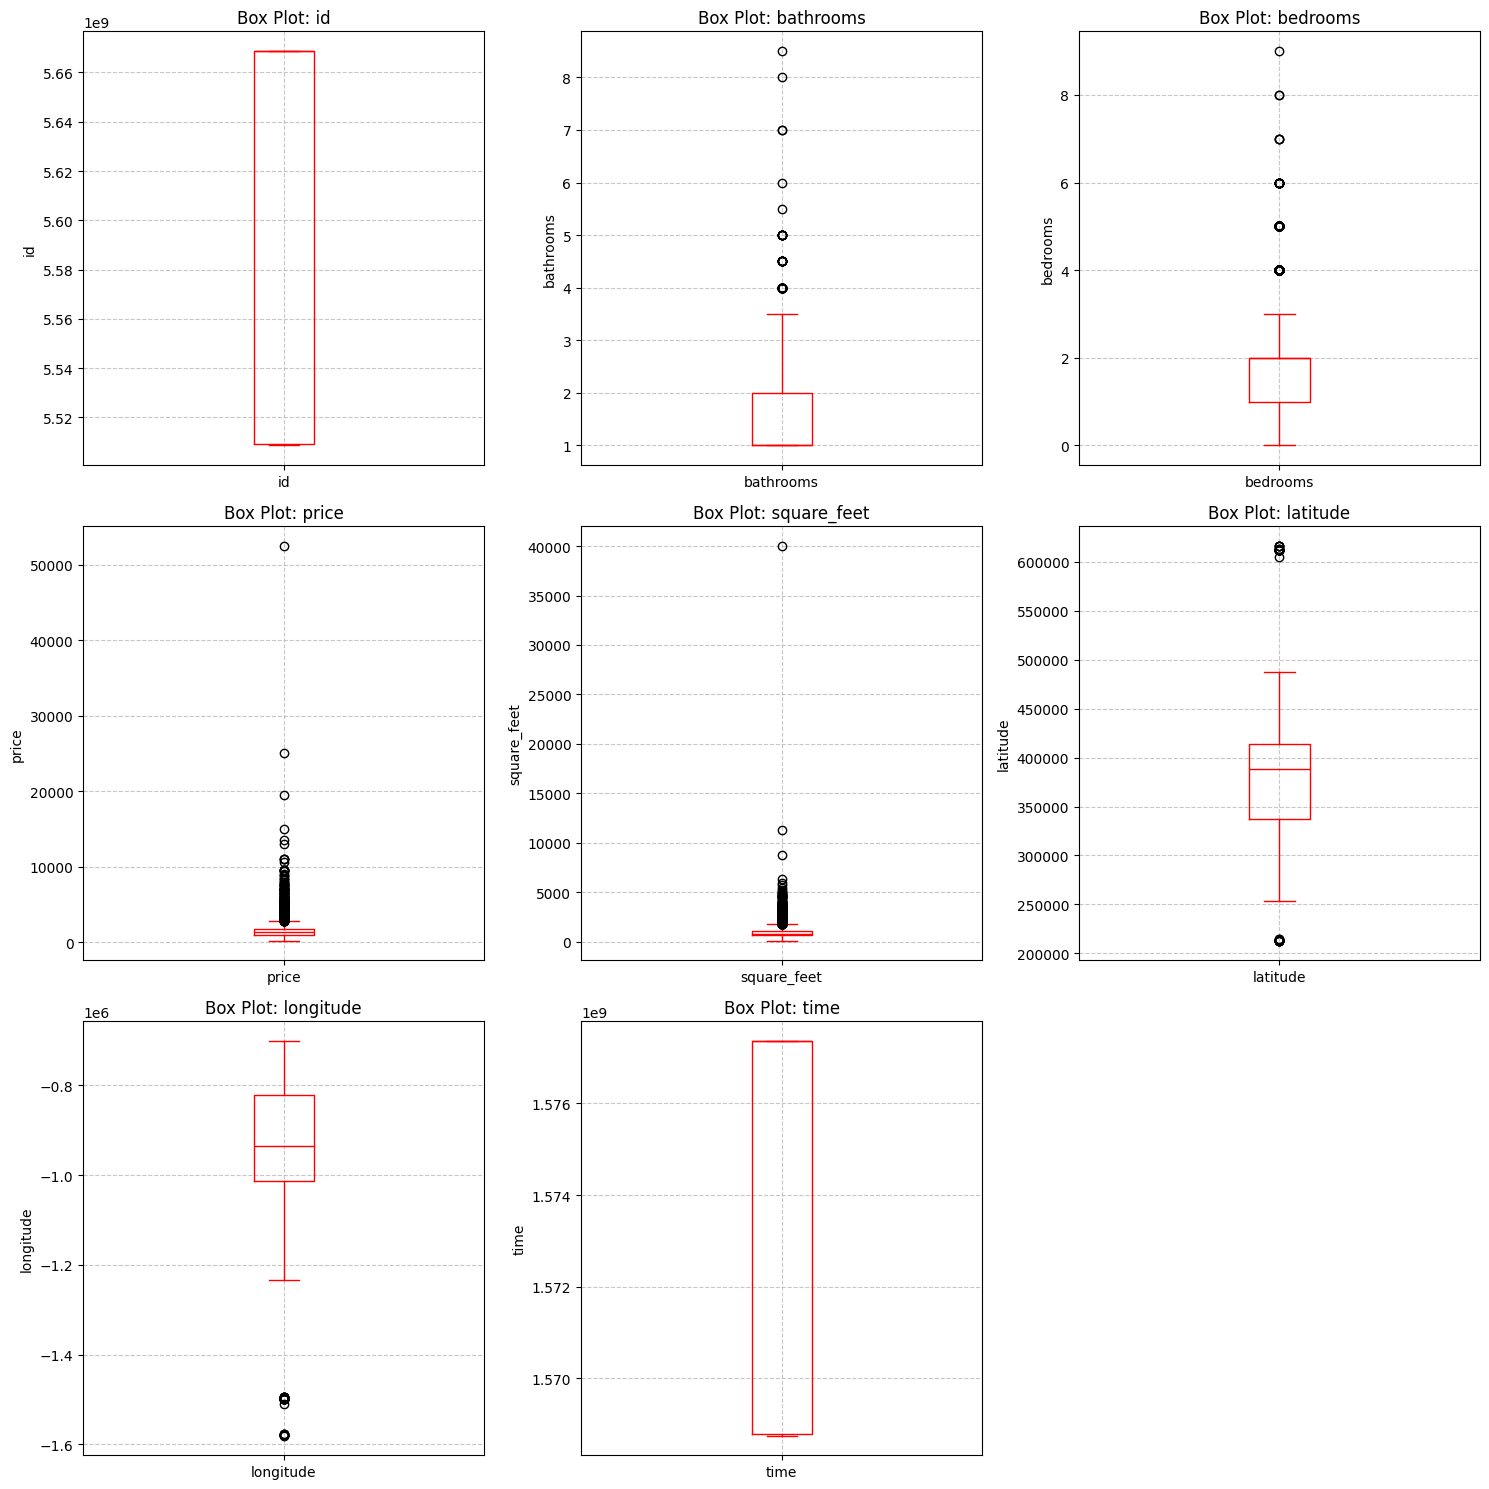

In [8]:
# Definir el número de columnas y filas para la matriz de diagramas de caja
num_vars = len(num_variables.columns)
cols = 3  # Número de columnas en la matriz
rows = math.ceil(num_vars / cols)  # Número de filas

# Crear la matriz de subplots para diagramas de caja
plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(num_variables.columns, 1):
    plt.subplot(rows, cols, i)
    num_variables[column].plot(kind='box', color='red')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('')
    plt.ylabel(column)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajuste automático del espacio entre gráficos
plt.show()


# Diagramas de Violín 

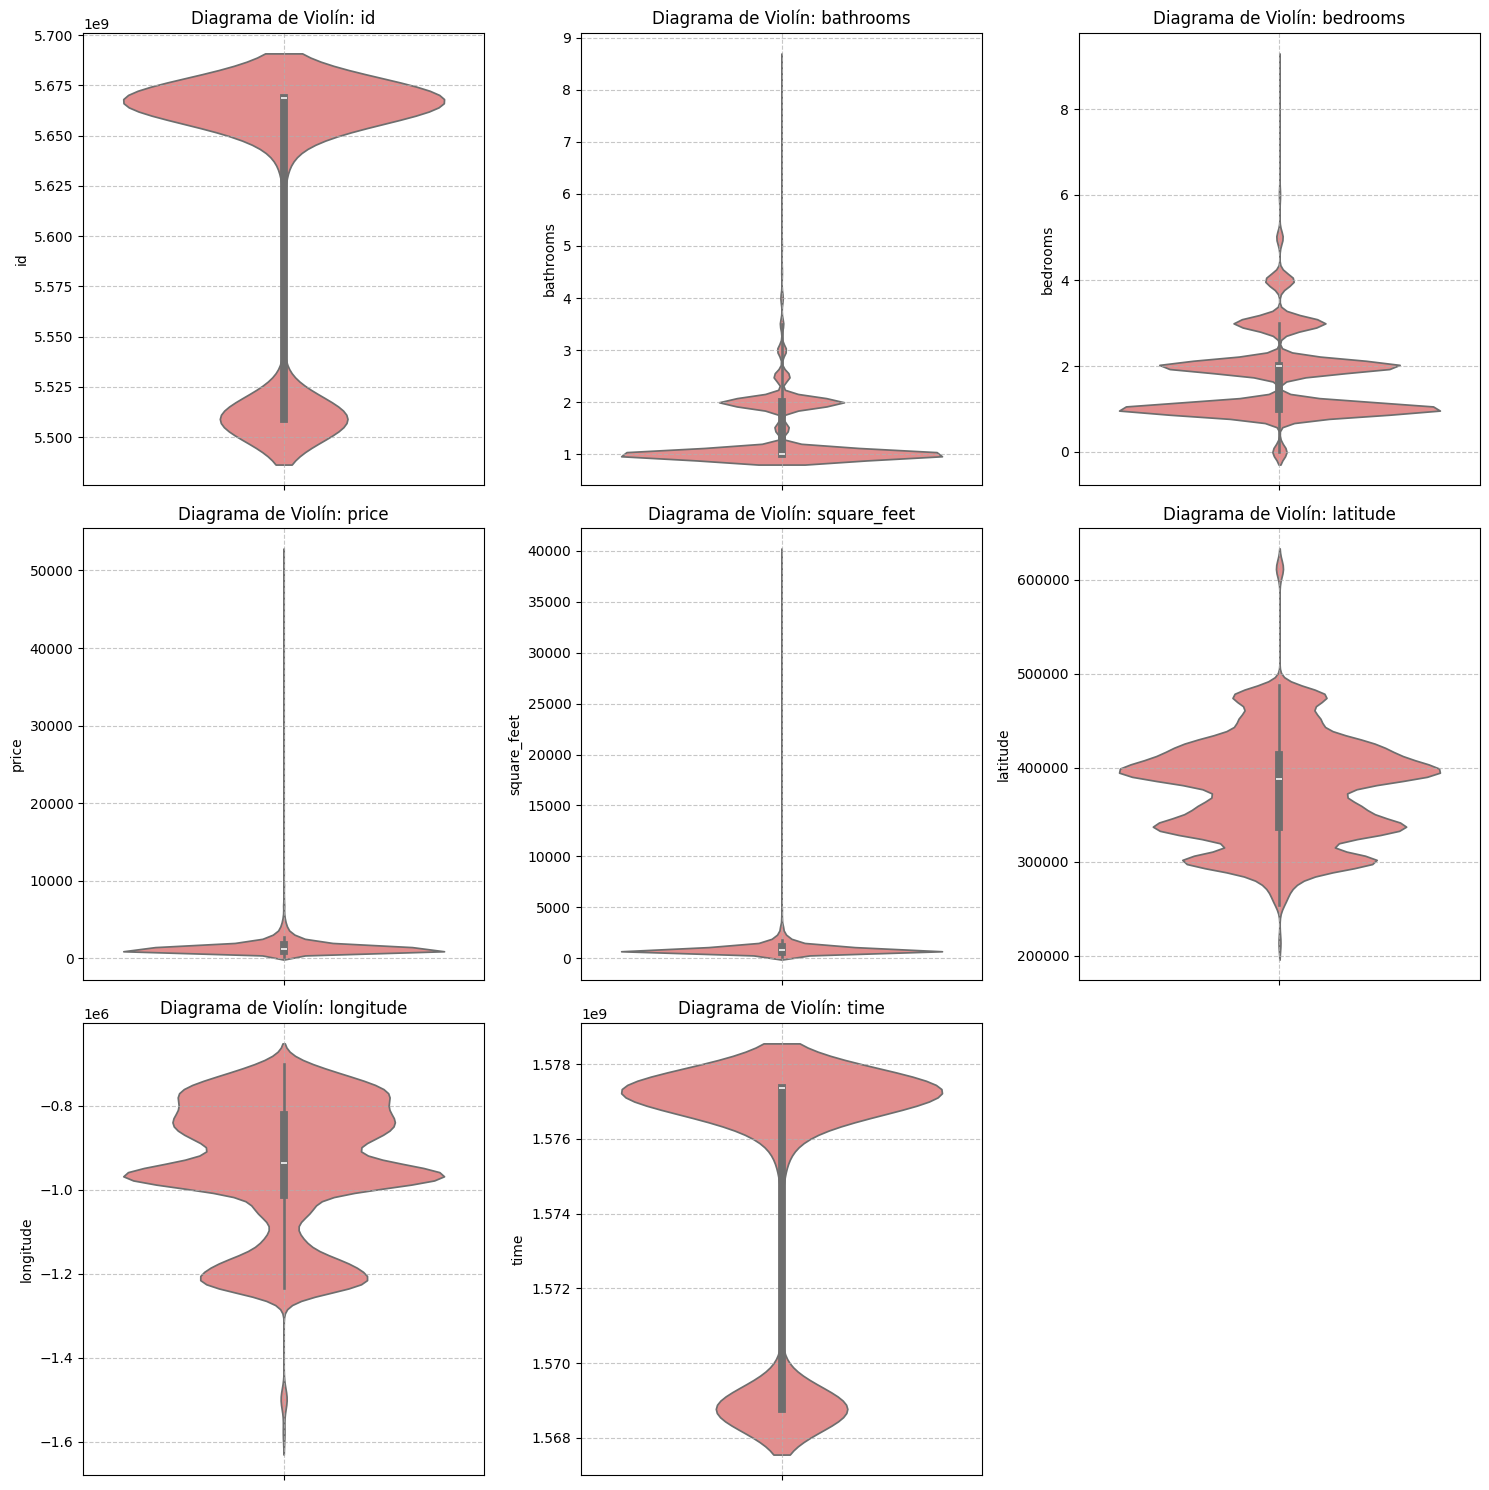

In [9]:
# Definir el número de columnas y filas para la matriz de diagramas de violín
num_vars = len(num_variables.columns)
cols = 3  # Número de columnas en la matriz
rows = math.ceil(num_vars / cols)  # Número de filas

# Crear la matriz de subplots para diagramas de violín
plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(num_variables.columns, 1):
    plt.subplot(rows, cols, i)
    sns.violinplot(y=df[column], color='lightcoral')
    plt.title(f'Diagrama de Violín: {column}')
    plt.xlabel('')
    plt.ylabel(column)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajuste automático del espacio entre gráficos
plt.show()


### Matriz de Dispersión

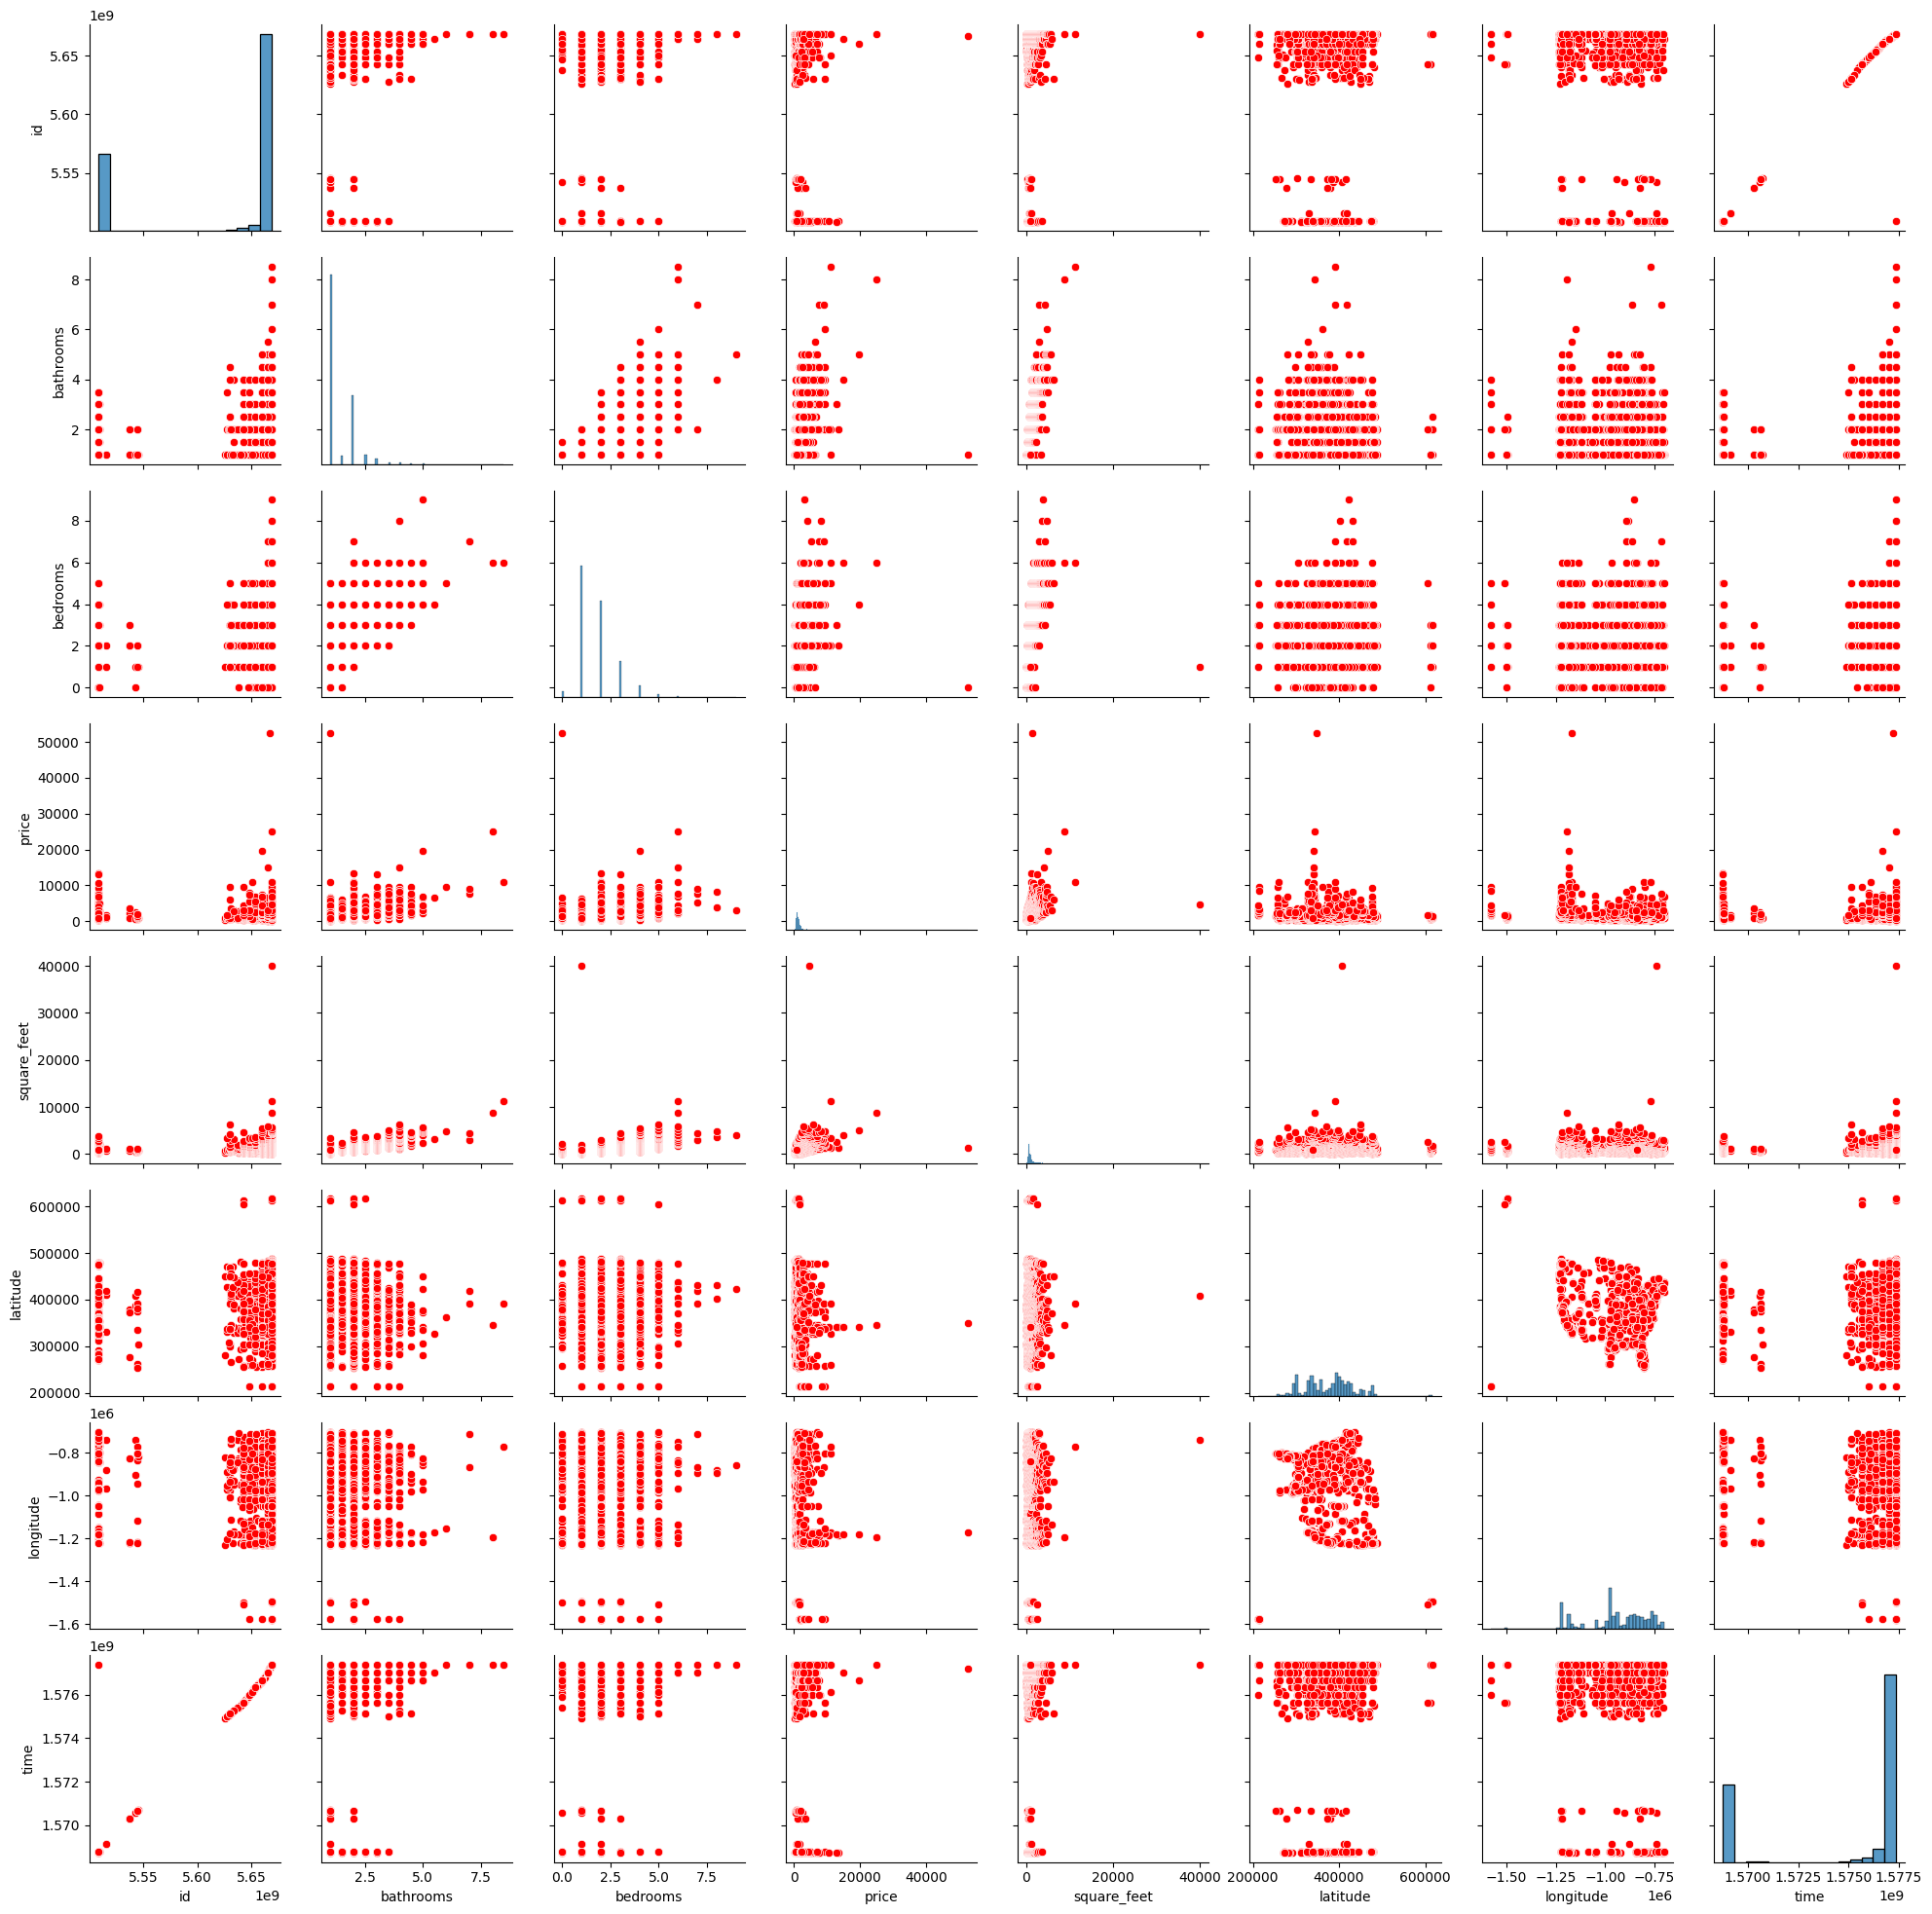

In [10]:
sns.pairplot(df, plot_kws={'color': 'red'})


### Matriz de Correlación

Text(0.5, 1.0, 'Matriz de Correlación')

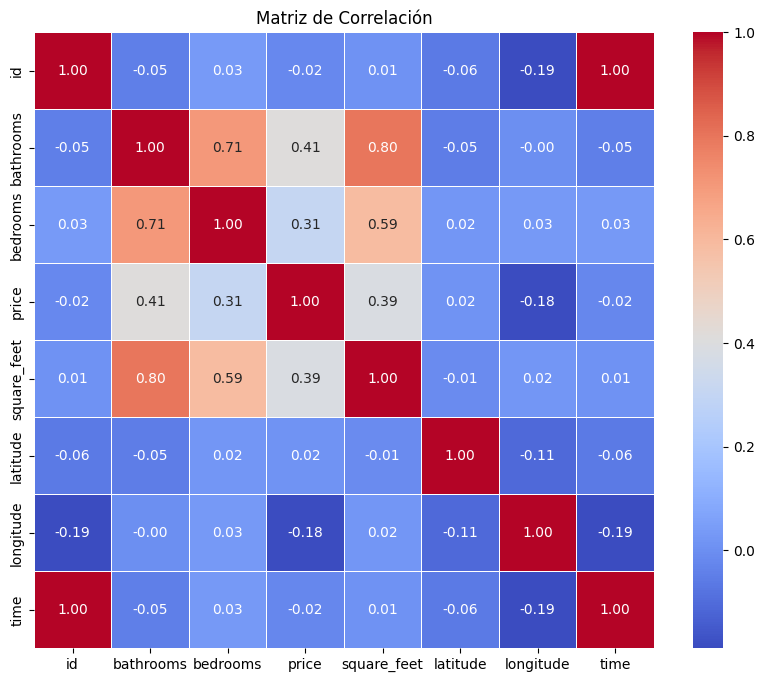

In [11]:
# Calcular la matriz de correlación
matriz = num_variables.corr()

# Crear el mapa de calor (heatmap) para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, 
            annot=True,             # Mostrar valores numéricos
            fmt='.2f',              # Formato con 2 decimales
            cmap='coolwarm',        # Colores del mapa ('viridis', 'plasma', etc.)
            linewidths=0.5,         # Líneas entre celdas
            cbar=True)              # Mostrar barra de color
plt.title('Matriz de Correlación')


### Correlación con respecto a la variable Precio

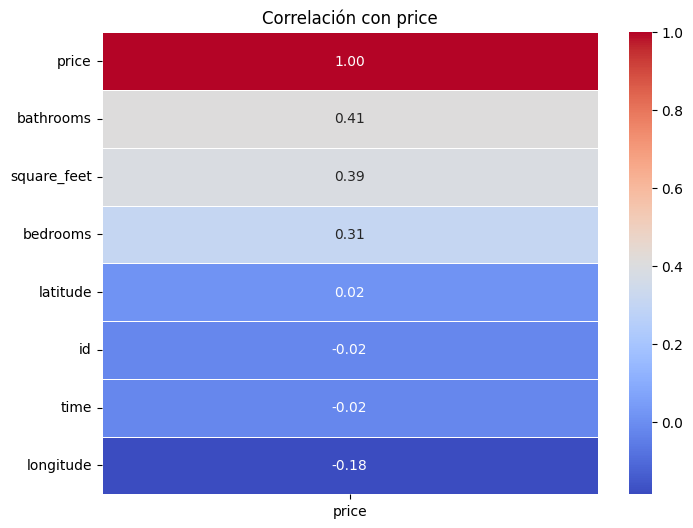

In [12]:
# Calcular la matriz de correlación
matriz_precio = num_variables.corr()

# Elegir la variable de respuesta: price
variable = 'price'

# Filtrar solo la correlación con la variable objetivo
correlation_target = matriz_precio[[variable]].sort_values(by=variable, ascending=False)

# Crear un heatmap para la correlación con la variable objetivo
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_target, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=True)
plt.title(f'Correlación con {variable}')
plt.show()
